<a href="https://colab.research.google.com/github/rselent/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-make-features/1_2_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [1]:
##### Begin Working Here #####

## Data fetch
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
!unzip LoanStats_2018Q4.csv.zip
!head LoanStats_2018Q4.csv

--2019-10-29 18:35:00--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                 <=>]  21.62M   865KB/s    in 26s     

2019-10-29 18:35:26 (851 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22667400]

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    
Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","

In [64]:
## Inspect Data pt 1
import numpy as np
import seaborn as sns
import pandas as pd

pd.options.display.max_rows = 999

df = pd.read_csv( "LoanStats_2018Q4.csv", header = 1, skipfooter = 2, engine = "python")
print( df.shape)
df.head()

(128412, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,...,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,...,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,...,66.7,0,0,430403,107975,49300,88875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10400,10400,10400.0,36 months,12.98%,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,800xx,CO,20.92,0,Jul-2013,2,32.0,67.0,8,1,1669,9.8%,10,w,8164.57,8164.57,3141.630000,3141.63,...,0.0,1,0,60709,39564,17000,43709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,35000,35000,35000.0,60 months,12.98%,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,797xx,TX,15.09,0,Sep-1985,0,77.0,NaN,13,0,55944,74.9%,39,w,0.00,0.00,36266.741552,36266.74,...,66.7,0,0,516204,82514,59700,51904,88364.0,Sep-1985,0.0,6.0,19.0,53.4,2.0,29.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
## Moar Data Inspection (pt 2)
print( df.dtypes, "\n\n")
print( df.isnull().sum().sort_values())

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [65]:
## Initial Cleanup - scrub potential personally identifiable information
## (it's already empty, but still)
df = df.drop([ "url", "member_id", "desc", "id"], axis = 1)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,...,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,...,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,...,66.7,0,0,430403,107975,49300,88875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,10400,10400,10400.0,36 months,12.98%,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,800xx,CO,20.92,0,Jul-2013,2,32.0,67.0,8,1,1669,9.8%,10,w,8164.57,8164.57,3141.630000,3141.63,2235.43,906.20,0.0,0.0,...,0.0,1,0,60709,39564,17000,43709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,35000,35000,35000.0,60 months,12.98%,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,797xx,TX,15.09,0,Sep-1985,0,77.0,NaN,13,0,55944,74.9%,39,w,0.00,0.00,36266.741552,36266.74,35000.00,1266.74,0.0,0.0,...,66.7,0,0,516204,82514,59700,51904,88364.0,Sep-1985,0.0,6.0,19.0,53.4,2.0,29.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
## Remove % from interest rate column

# First, a dummy case:
intRate = "  14.47%"
print( float( intRate.lstrip().rstrip("%")) )

# That works. Good. Now to apply it to the whole column:
def intRate_toFloat( intRate_str):
  return float( intRate_str.lstrip().rstrip("%") )

df[ "int_rate"] = df["int_rate"].apply( intRate_toFloat)

14.47


In [67]:
## Clean Employment Titles

# Look at a slice of the column, see if anything seems fishy:
print( df[ "emp_title"].value_counts( dropna = False)[:25], "\n\n\n" )

# Apparently there's null values in what's supposed to be a string field. not gucci

# Totally copy-pasta'ing this func, because there's no way I'd remember it rn.
# Buuuuuut, basically, it checks an input, if it's a str, it cleans surrounding whitespace,
# If any, and title-izes the words. If it's not a string, it baaaaasically turns it into a str
# By returning "Unknown" instead of a null (float) value
def cleanTitleUp( title):
  if isinstance( title, str):
    return title.strip().title()
  else:
    return "Unknown"

## Now, applying it to the column, but in a non-destructive way:
df1 = df
df1[ "emp_title"] = df1[ "emp_title"].apply( cleanTitleUp)

# Annnnnd, verification:
print( df1[ "emp_title"].value_counts( dropna = False)[:25] )

# Orrrrrr... at least non-destructive was the plan...?
# if the module is run a second time, even nulls in OG df are "Unknown"?
# *****something to investigate later....

NaN                         20947
Teacher                      2090
Manager                      1773
Registered Nurse              952
Driver                        924
RN                            726
Supervisor                    697
Sales                         580
Project Manager               526
General Manager               523
Office Manager                521
Owner                         420
Director                      402
Operations Manager            387
Truck Driver                  387
Nurse                         326
Engineer                      325
Sales Manager                 304
manager                       301
Supervisor                    270
Administrative Assistant      269
Accountant                    268
Server                        265
Vice President                261
Mechanic                      258
Name: emp_title, dtype: int64 



Unknown                     20947
Teacher                      2557
Manager                      2395
Registered Nur

In [69]:
## Filter dataframe by extracting and appending certain data as columns

# Add one for management only:
df1[ "emp_ManagerTitle"] = df1[ "emp_title"].str.contains( "Manager")

# Verification:
# Print statement is acceptable because we only care about the appended column here,
# Which it will show without us having to scroll #thinkSmarterNotHarder
print( df1.head(), "\n\n----------\n")

# Create a condition based on that bool column:
condition1 = (df1[ "emp_ManagerTitle"] == True)

## Use conditions to retain or omit rows that either meet or do not meet it
management = df1[ condition1]

# Even thought the same could be achieved by just calling:
# print( df1[ condition1][:10])
# Instead of assigning it to a var first,
# I presume things can get sloppy further on down the line if we, perhaps,
# Want to do more things with this specific filter
print( management[:10], "\n\n----------\n")

## Like conditionals in any other part of Python (loops?), operands can also be used here:
minions = df1[ -condition1]

print( minions[:10], "\n\n----------\n")

# And then we can also compare other features of these newly created demographics:
print( "Managers' mean interest rate is: {:.2f}%".format( management[ "int_rate"].mean()) )
print( "And the minions, in contrast: {:.2f}%".format( minions[ "int_rate"].mean()) )


   loan_amnt  funded_amnt  ...  settlement_term emp_ManagerTitle
0      20000        20000  ...              NaN            False
1      25000        25000  ...              NaN             True
2      26500        26500  ...              NaN            False
3      10400        10400  ...              NaN            False
4      35000        35000  ...              NaN             True

[5 rows x 141 columns] 

----------

    loan_amnt  funded_amnt  ...  settlement_term emp_ManagerTitle
1       25000        25000  ...              NaN             True
4       35000        35000  ...              NaN             True
8       12000        12000  ...              NaN             True
16      12000        12000  ...              NaN             True
18      20400        20400  ...              NaN             True
22      32000        32000  ...              NaN             True
39       7500         7500  ...              NaN             True
44       1000         1000  ...             

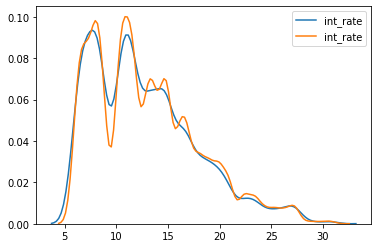

In [74]:
## In visual form, the above can be delineated as such:

sns.kdeplot( management[ "int_rate"])
sns.kdeplot( minions[ "int_rate"]);

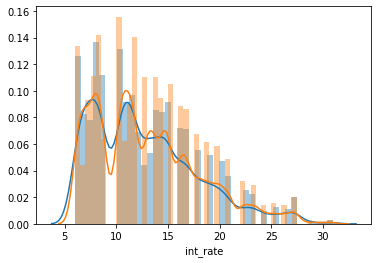

In [77]:
# There are also other forms of visualizations available:

sns.distplot( management[ "int_rate"])
sns.distplot( minions[ "int_rate"]);

In [0]:
## Not going to replicate the date/time section, as it was a lot, and the
## 'Actual' part of the assignment (replicated below) covers that material anyway

- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
## Convert term column from str to int

# First, inspect the column, check for anomalous entries
print( df1[ "term"].describe(), "\n\n")
print( df1[ "term"].value_counts( dropna = False), "\n\n")
# *** value_counts says "term" already has a dtype of int64??

# Stripping "months" func
def strToInt( term):
    return int( term.strip(" months"))

df1[ "term"] = df1[ "term"].apply( strToInt)
print( df1[ "term"].dtypes)
# This will only run once, btw

In [91]:
df1[ "loan_status"].value_counts( dropna = False)

Current               105925
Fully Paid             15780
Charged Off             2863
Late (31-120 days)      2482
In Grace Period          901
Late (16-30 days)        459
Default                    2
Name: loan_status, dtype: int64

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01